In [263]:
import pandas as pd
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import neighbors
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

**Question 1**

In [264]:
#load the dataset
mydata = pd.read_csv("http://people.stern.nyu.edu/vt527/perf.data", header = None)
mydata.head(10)

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


**Question 2**

In [265]:
#Look at the first 10 rows of the dataset
mydata.head(10)

,0,1,2,3,4,5
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [266]:
#How many columns and rows? 
print("This dataset has ", str(mydata.shape[1]), "columns and ", str(mydata.shape[0]), "rows.")
#I got the mydata.shape[] code from:
#https://stackoverflow.com/questions/20297332/python-pandas-dataframe-retrieve-number-of-columns

#Change the column names to the Attribute Names
attribute_names = ['f1','f2','f3','f4','f5','f6']
mydata.columns = attribute_names
mydata.head() #check to see if it did it.
mydata[(mydata['f6'] == 2)] = 1
mydata[(mydata['f6'] == 3)] = 0
print("")

#Show summary statistics
print("Summary Statistics:")
print(mydata.describe())

print("")

uniqueCounts = mydata.groupby("f6").size()
print(uniqueCounts)

#Inner missing values from f2
uniqueCounts_f2 = mydata.groupby("f2").size()
#the most frequent value is 23
#change values of 22 in f2 to 23
mydata["f2"] = mydata["f2"].replace(22,23)

#Frequency of Target Variable
uniqueCounts = mydata.groupby("f6").size()
print(uniqueCounts)
uniqueCounts_f2_changed = mydata.groupby("f2").size()
print(uniqueCounts_f2_changed) #check to see if it worked

This dataset has  6 columns and  151 rows.

Summary Statistics:
               f1          f2          f3          f4          f5          f6
count  151.000000  151.000000  151.000000  151.000000  151.000000  151.000000
mean     0.947020    4.615894    2.125828    0.966887    9.880795    0.655629
std      0.798232    7.035966    3.828498    0.811724   15.520708    0.476744
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
50%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000
75%      2.000000    7.000000    2.000000    2.000000   19.000000    1.000000
max      2.000000   23.000000   20.000000    2.000000   66.000000    1.000000

f6
0    52
1    99
dtype: int64
f6
0    52
1    99
dtype: int64
f2
0     52
1     50
2      2
3      2
4      2
5      4
7      2
8      2
10     3
11     2
12     1
13     5
14     3
15     2
16     3
17     1
18     3
19     1
20  

In [267]:
mydata.head()


,f1,f2,f3,f4,f5,f6
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


**Question 3**

In [268]:
#change Categorical Variables to dummy variables

#Creating Dummy Variables
colsToCreateDummiesFrom = ["f2", "f3"]
separator = "_"
for colName in colsToCreateDummiesFrom:
    dummies = pd.get_dummies(mydata[colName]).rename(columns=lambda x: colName + separator + str(x))
    mydata = pd.concat([mydata, dummies], axis=1)
    mydata.drop([colName], inplace=True, axis=1)
    if dummies.columns.size == 2:
        mydata.drop([colName+"_1"], inplace=True, axis=1)
    else:
        if (colName + separator + "unknown") in dummies.columns :
            mydata.drop([colName+"_unknown"], inplace=True, axis=1)
        elif colName == 'marital':
            mydata.drop([colName+"_single"], inplace=True, axis=1)
        elif colName == 'poutcome':
            mydata.drop([colName+"_nonexistent"], inplace=True, axis=1)   
        else:
            print("### Drop a column from below dummies -")
            print(dummies.columns)

### Drop a column from below dummies -
Index(['f2_0', 'f2_1', 'f2_2', 'f2_3', 'f2_4', 'f2_5', 'f2_7', 'f2_8', 'f2_10',
       'f2_11', 'f2_12', 'f2_13', 'f2_14', 'f2_15', 'f2_16', 'f2_17', 'f2_18',
       'f2_19', 'f2_20', 'f2_21', 'f2_23'],
      dtype='object')
### Drop a column from below dummies -
Index(['f3_0', 'f3_1', 'f3_2', 'f3_3', 'f3_4', 'f3_5', 'f3_7', 'f3_8', 'f3_9',
       'f3_10', 'f3_11', 'f3_15', 'f3_16', 'f3_18', 'f3_20'],
      dtype='object')


In [269]:
mydata.head()

,f1,f4,f5,f6,f2_0,f2_1,f2_2,f2_3,f2_4,f2_5,...,f3_5,f3_7,f3_8,f3_9,f3_10,f3_11,f3_15,f3_16,f3_18,f3_20
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [270]:
#check to see if we now have dummy variables
mydata.head()
print("This dataset has ", str(mydata.shape[1]), "columns and ", str(mydata.shape[0]), "rows.")
cleanedData= mydata
#shuffle the data before splitting
cleanedData = cleanedData.sample(frac=1).reset_index(drop=True)

#split data 
train, test = train_test_split(cleanedData, test_size = .4, stratify = cleanedData["f6"], random_state = 13)

target_variable= cleanedData["f6"]

X_train = train.loc[:,cleanedData.columns.difference(["f6"])]
y_train = train.loc[:,"f6"]
X_test = test.loc[:,cleanedData.columns.difference(["f6"])]
y_test = test.loc[:,"f6"]

#Check to make sure splitting went well
ytrain = pd.DataFrame(y_train)
ytest = pd.DataFrame(y_test)
uniqueCounts_ytrain = ytrain.groupby("f6").size()
print(uniqueCounts_ytrain)
uniqueCounts_ytest = ytest.groupby("f6").size()
print(uniqueCounts_ytest)

This dataset has  40 columns and  151 rows.
f6
0    31
1    59
dtype: int64
f6
0    21
1    40
dtype: int64


In [271]:
#Standardize the data
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

#Standardize the data
sc = StandardScaler()
sc.fit(X_test)
X_test_std = sc.transform(X_test)
#these standardized xs are to be used in Logistic regression and KNN.



**Question 4**

In [272]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("")
    else:
        print('')

    print("")

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [273]:
def print_metrics(clf, xtrain, ytrain, xtest, ytest, ypred):
    print(classification_report(ypred, ytest))
    metrics = ['accuracy', 'f1', 'precision', 'recall']
    for metric in metrics:
        scores = cross_val_score(estimator=clf,  #Estimate AUC based on cross validation
                             X=xtrain,
                             y=ytrain,
                             cv=10,
                             scoring=metric)
        print("%0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), metric))
    
    plot_confusion_matrix(confusion_matrix(ypred, ytest), classes=['Low','High'])

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00        61

1.00 (+/- 0.00) [accuracy]
1.00 (+/- 0.00) [f1]
1.00 (+/- 0.00) [precision]
1.00 (+/- 0.00) [recall]




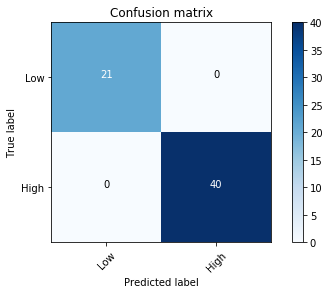

In [274]:
clf_DT = DecisionTreeClassifier(criterion = "entropy", random_state = 13, max_depth = 5)
clf_DT = clf_DT.fit(X_train, y_train)
y_pred_DT = clf_DT.predict(X_test)

print_metrics(clf_DT, X_train, y_train, X_test, y_test, y_pred_DT)
#Note this code segment was built based off of class notes.

In [240]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
export_graphviz(
        clf_DT,
        rounded=True,
        filled=True,
        out_file= "Decision_tree.dot"
    )
Image('Decision_tree.png')

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>

**Question 5**

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00        61

1.00 (+/- 0.00) [accuracy]
1.00 (+/- 0.00) [f1]
1.00 (+/- 0.00) [precision]
1.00 (+/- 0.00) [recall]




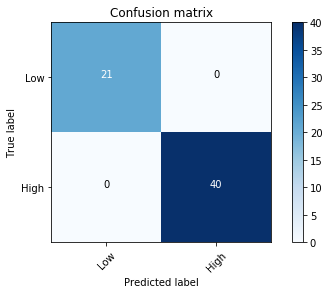

In [241]:
clf_lr = LogisticRegression(penalty='l1', 
                          C=100,
                          random_state=13)
clf_lr=clf_lr.fit(X_train, y_train)
y_pred_lr = clf_lr.predict(X_test)
print_metrics(clf_lr, X_train, y_train, X_test, y_test, y_pred_lr)

**Question 6**

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        21
          1       1.00      1.00      1.00        40

avg / total       1.00      1.00      1.00        61

1.00 (+/- 0.00) [accuracy]
1.00 (+/- 0.00) [f1]
1.00 (+/- 0.00) [precision]
1.00 (+/- 0.00) [recall]




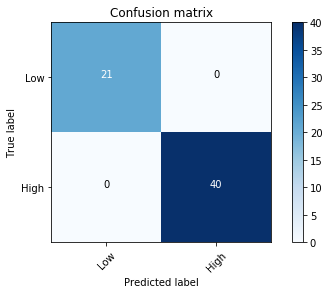

In [276]:
clf_knn = KNeighborsClassifier(n_neighbors=3,
                            p=2,
                            metric='minkowski',
                            weights='distance')
clf_knn=clf_knn.fit(X_train_std, y_train)
y_pred_knn = clf_knn.predict(X_test_std)
accuracy_score(y_test, y_test)
print_metrics(clf_knn, X_train_std, y_train, X_test_std, y_test, y_pred_knn)

**ROC Curve**

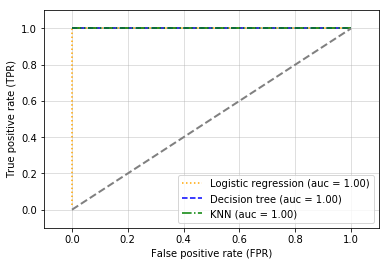

In [277]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = [ 'orange', 'blue', 'green']      #Colors for visualization
linestyles = [':', '--', '-.', '-']        #Line styles for visualization

all_clf = [clf_lr, clf_DT, clf_knn]
for clf, label, clr, ls in zip(all_clf,
               clf_labels, colors, linestyles):
    if clf == clf_knn:
        y_pred = clf.fit(X_train_std,
                     y_train).predict_proba(X_test_std)[:, 1] # Make predictions based on the classifiers
        fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred, pos_label=1)
        roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
        plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
                 color=clr,
                 linestyle=ls,
                 label='%s (auc = %0.2f)' % (label, roc_auc))
    else:
        y_pred = clf.fit(X_train,
                     y_train).predict_proba(X_test)[:, 1] # Make predictions based on the classifiers
        fpr, tpr, thresholds = roc_curve(y_true=y_test, # Build ROC curve
                                     y_score=y_pred,pos_label=1)
        roc_auc = auc(x=fpr, y=tpr)                # Compute Area Under the Curve (AUC) 
        plt.plot(fpr, tpr,                         # Plot ROC Curve and create label with AUC values
                 color=clr,
                 linestyle=ls,
                 label='%s (auc = %0.2f)' % (label, roc_auc))

#draw random classifier line    
plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

In [254]:
y_test.head()
y_train.head()

146    0
78     0
133    1
124    1
45     1
Name: f6, dtype: int64

In [279]:
gs_lr = GridSearchCV(estimator=LogisticRegression(random_state=42),
                  param_grid=[{'C': [ 0.00001, 0.0001, 0.001, 0.01, 0.1 ,1 ,10 ,100, 1000, 10000, 100000, 1000000, 10000000],
                             'penalty':['l1','l2']}],
                  scoring='accuracy',
                  cv=10)
gs_lr = gs_lr.fit(X_train,y_train)
y_pred_lr_gs = gs_lr.predict(X_test)
accuracy_score(y_test, y_pred_lr_gs)

1.0

In [261]:
#Grid Search For Best Decision Tree
gs_DT_acc = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None],'min_samples_leaf':[1,2,3,4,5], 'criterion':["gini", "entropy"],
                              'min_samples_split':[2,3,4,5]}],
                  scoring='accuracy', # Specifying multiple metrics for evaluation
                  cv=10)
gs_DT_acc = gs_DT_acc.fit(X_train,y_train)
gs_DT_acc_params = gs_DT_acc.best_params_
y_pred_DT = gs_DT_acc.predict(X_test)
accuracy_score(y_pred_DT, y_test)

1.0

In [262]:
weights = ["uniform", "distance"]
cv_fold = 5
n_jobs = 4
gs_KNN_acc = GridSearchCV(estimator=neighbors.KNeighborsClassifier(p=2, metric='minkowski'),
                       param_grid=[{'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                                    'weights': weights}],
                  scoring='accuracy',
                  cv=cv_fold,
                  n_jobs=n_jobs)

gs_KNN_acc = gs_KNN_acc.fit(X_train_std,y_train)
gs_KNN_acc_params = gs_KNN_acc.best_params_
y_pred_knn = gs_DT_acc.predict(X_test_std)
accuracy_score(y_pred_knn, y_test)

1.0